# Knn

### Storing all the df needed

In [10]:
%store -r X y  X_under y_under X_over y_over

### Normal df

<AxesSubplot:>

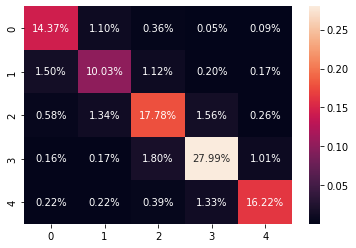

In [6]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))])


pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)

"""disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_, p)
disp.plot()
plt.show()"""

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# cross_val_score(pipe, X, y, cv=10)
# pipe.score(X_test, y_test)


In [ ]:
print('test data score:', pipe.score(X_test, y_test), '\ntrain data score:', pipe.score(X_train, y_train))

In [ ]:
from sklearn.model_selection import cross_validate

cv_dict = cross_validate(pipe, X_train, y_train, cv = 5, return_train_score=True)

cv_dict

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

### UnderSampeled Df

In [ ]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.33, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1))])


pipe.fit(X_under_train, y_under_train)

predictions_under_df = pipe.predict(X_under_test)

"""disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_, p)
disp.plot()
plt.show()"""

cm = confusion_matrix(y_under_test, predictions_under_df, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# cross_val_score(pipe, X, y, cv=10)
# pipe.score(X_test, y_test)


In [ ]:
print('Under test data score:', pipe.score(X_under_test, y_under_test), '\nUnder train data score:', pipe.score(X_under_train, y_under_train))

In [ ]:
from sklearn.model_selection import cross_validate

cv_dict = cross_validate(pipe, X_under_train, y_under_train, cv = 5, return_train_score=True)

cv_dict

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_under_test, predictions_under_df))

### OverSampled Df

<AxesSubplot:>

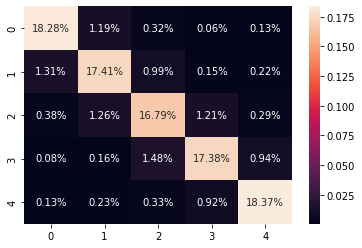

In [11]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.33, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=1, algorithm="brute"))])


pipe.fit(X_over_train, y_over_train)

predictions_over_df = pipe.predict(X_over_test)

"""disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_, p)
disp.plot()
plt.show()"""

cm = confusion_matrix(y_over_test, predictions_over_df, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# cross_val_score(pipe, X, y, cv=10)
# pipe.score(X_test, y_test)

In [12]:
print('Over test data score:', pipe.score(X_over_test, y_over_test), '\nOver train data score:', pipe.score(X_over_train, y_over_train))

Over test data score: 0.8822428808976648 
Over train data score: 0.9922095404864634


In [ ]:
from sklearn.model_selection import cross_validate

cv_dict = cross_validate(pipe, X_over_train, y_over_train, cv = 5, return_train_score=True)

cv_dict

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_over_test, predictions_over_df))

              precision    recall  f1-score   support

           a       0.91      0.91      0.91     74866
           b       0.86      0.87      0.86     75248
           c       0.84      0.84      0.84     74629
           d       0.88      0.87      0.87     75077
           e       0.92      0.92      0.92     74841

    accuracy                           0.88    374661
   macro avg       0.88      0.88      0.88    374661
weighted avg       0.88      0.88      0.88    374661



In [22]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score


precision, recall, fscore, support = score(y_over_test, predictions_over_df)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('accuracy : {}'.format(accuracy_score(y_over_test, predictions_over_df)))
      

precision: [0.90555335 0.85995306 0.84348094 0.88144449 0.92073644]
recall: [0.91479443 0.86678716 0.8427689  0.8674028  0.91946927]
fscore: [0.91015044 0.86335659 0.84312477 0.87436727 0.92010242]
accuracy : 0.8822428808976648
